### 腐烂的橘子
在给定的网格中，每个单元格可以有以下三个值之一：

    值 0 代表空单元格；
    值 1 代表新鲜橘子；
    值 2 代表腐烂的橘子。

每分钟，任何与腐烂的橘子（在 4 个正方向上）相邻的新鲜橘子都会腐烂。

返回直到单元格中没有新鲜橘子为止所必须经过的最小分钟数。如果不可能，返回 -1。

[链接](https://leetcode-cn.com/problems/rotting-oranges)
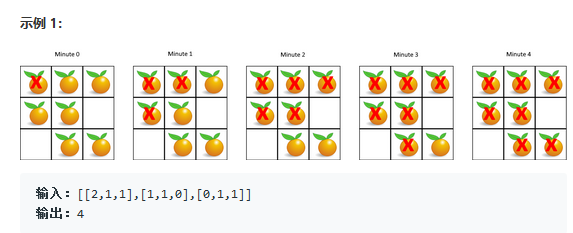  
注： 

    1 <= grid.length <= 10  
    1 <= grid[0].length <= 10  
    grid[i][j] 仅为 0、1 或 2  


### 解题思路  
这道题用广度优先搜索。  
返回直到单元格中没有新鲜橘子为止所必须经过的最小分钟数。翻译一下，实际上就是求腐烂橘子到所有新鲜橘子的最短路径。那么这道题使用 BFS，应该是毫无疑问的了。  
#### 主要思路：  
一开始，我们找出所有腐烂的橘子，将它们放入队列，作为第 0 层的结点。  
然后进行 BFS 遍历，每个结点的相邻结点可能是上、下、左、右四个方向的结点，注意判断结点位于网格边界的特殊情况。  

#### 时间复杂度：  
  
#### 主要注意事项：  
由于可能存在无法被污染的橘子，我们需要记录新鲜橘子的数量。在 BFS 中，每遍历到一个橘子（污染了一个橘子），就将新鲜橘子的数量减一。如果 BFS 结束后这个数量仍未减为零，说明存在无法被污染的橘子。  

In [96]:
grid = [[2,1,1],[1,1,0],[0,1,1]]
#grid = [[2,1,1],[0,1,1],[1,0,1]]
#grid = [[0,2]]

In [97]:
M = len(grid)
N = len(grid[0])
queue = []

count = 0 # count 表示新鲜橘子的数量
for r in range(M):
    for c in range(N):
        if grid[r][c] == 1:
            count += 1
        elif grid[r][c] == 2:
            queue.append((r, c))
            
round = 0 # round 表示腐烂的轮数，或者分钟数
while count > 0 and len(queue) > 0:
    round += 1 
    n = len(queue)
    for i in range(n):
        r, c = queue.pop(0)
        if r-1 >= 0 and grid[r-1][c] == 1:
            grid[r-1][c] = 2
            count -= 1
            queue.append((r-1, c))
        if r+1 < M and grid[r+1][c] == 1:
            grid[r+1][c] = 2
            count -= 1
            queue.append((r+1, c))
        if c-1 >= 0 and grid[r][c-1] == 1:
            grid[r][c-1] = 2
            count -= 1
            queue.append((r, c-1))
        if c+1 < N and grid[r][c+1] == 1:
            grid[r][c+1] = 2
            count -= 1
            queue.append((r, c+1))

if count > 0:
    k = -1
else:
    k = round
k

4